In [1]:
import mplhep as hep
import uproot
from matplotlib import pyplot as plt

from egamma_tnp.plot import plot_efficiency, plot_ratio

In [75]:
hep.style.use("CMS")
hep.style.use(
    {
        "figure.figsize": (6.4, 4.8),
        "font.size": 14,
        "legend.title_fontsize": 14,
        "savefig.bbox": "tight",
    }
)


def get_histograms(path):
    with uproot.open(path) as file:
        hpt_barrel_pass = file["pt/barrel/passing"].to_hist()
        hpt_barrel_all = file["pt/barrel/all"].to_hist()
        hpt_endcap_loweta_pass = file["pt/endcap_loweta/passing"].to_hist()
        hpt_endcap_loweta_all = file["pt/endcap_loweta/all"].to_hist()
        hpt_endcap_higheta_pass = file["pt/endcap_higheta/passing"].to_hist()
        hpt_endcap_higheta_all = file["pt/endcap_higheta/all"].to_hist()
        hpt_combined_pass = hpt_barrel_pass + hpt_endcap_loweta_pass + hpt_endcap_higheta_pass
        hpt_combined_all = hpt_barrel_all + hpt_endcap_loweta_all + hpt_endcap_higheta_all

        heta_entire_pass = file["eta/entire/passing"].to_hist()
        heta_entire_all = file["eta/entire/all"].to_hist()

        hphi_entire_pass = file["phi/entire/passing"].to_hist()
        hphi_entire_all = file["phi/entire/all"].to_hist()

    return (
        hpt_barrel_pass,
        hpt_barrel_all,
        hpt_endcap_loweta_pass,
        hpt_endcap_loweta_all,
        hpt_endcap_higheta_pass,
        hpt_endcap_higheta_all,
        hpt_combined_pass,
        hpt_combined_all,
        heta_entire_pass,
        heta_entire_all,
        hphi_entire_pass,
        hphi_entire_all,
    )


def pt_low_threshold_plot_setup(**legend_kwargs):
    plt.xlim(10, 400)
    plt.ylim(0, 1.2)
    plt.xlabel(r"Offline electron $P_T$ [GeV]")
    plt.ylabel(r"Efficiency")
    plt.xscale("log")
    plt.xticks([10, 100], [10, 100])
    plt.xticks(
        [20, 30, 40, 50, 60, 70, 80, 90, 200, 300, 400],
        [20, 30, 40, 50, None, None, None, None, 200, 300, 400],
        minor=True,
    )
    plt.legend(**legend_kwargs) if legend_kwargs else plt.legend()


def pt_high_threshold_plot_setup(**legend_kwargs):
    plt.xlim(10, 400)
    plt.ylim(0, 1.2)
    plt.xlabel(r"Offline electron $P_T$ [GeV]")
    plt.ylabel(r"Efficiency")
    plt.legend(**legend_kwargs) if legend_kwargs else plt.legend()


def eta_plot_setup(**legend_kwargs):
    plt.xlim(-2.5, 2.5)
    plt.ylim(0, 1.2)
    plt.xlabel(r"Offline electron $\eta$")
    plt.ylabel(r"Efficiency")
    plt.legend(**legend_kwargs) if legend_kwargs else plt.legend()


def phi_plot_setup(**legend_kwargs):
    plt.xlim(-3.32, 3.32)
    plt.ylim(0, 1.2)
    plt.xlabel(r"Offline electron $\phi$")
    plt.ylabel(r"Efficiency")
    plt.legend(**legend_kwargs) if legend_kwargs else plt.legend()


lumis = {
    "2022C": 5.0707,
    "2022D": 3.0063,
    "2022E": 5.8783,
    "2022F": 18.0070,
    "2022G": 3.1219,
    "2023B": 0.622,
    "2023C": 17.060,
    "2023D": 9.525,
}

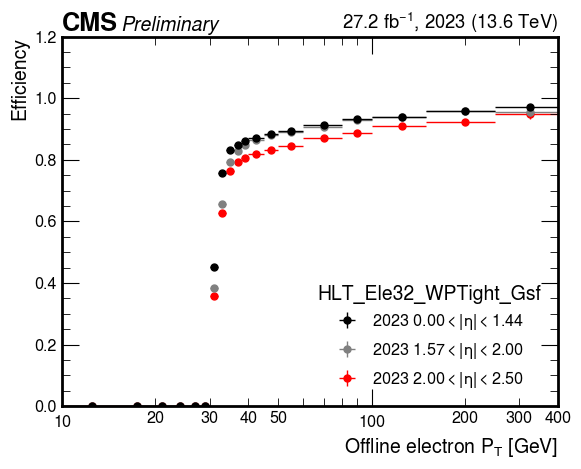

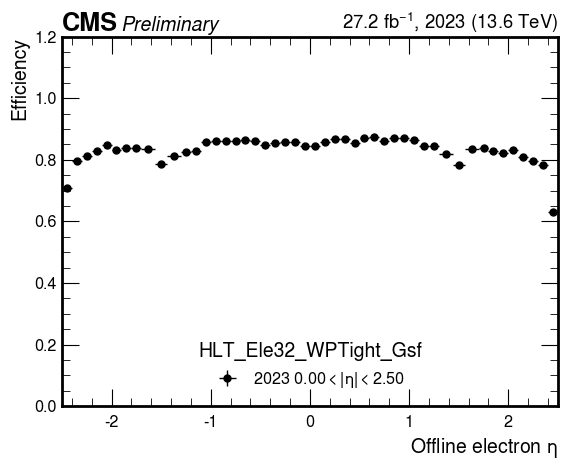

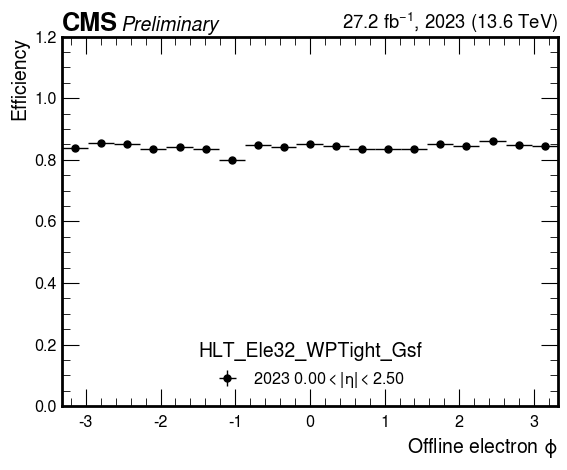

In [76]:
file = "Run2023_Ele32.root"
run = file.split("_")[0][3:]
threshold = file.split("_")[1].split(".")[0]
suffix = "WPTight_Gsf" if threshold == "Ele32" or threshold == "Ele30" else "CaloIdVT_GsfTrkIdT"
pt_setup_func = pt_low_threshold_plot_setup if threshold == "Ele32" or threshold == "Ele30" else pt_high_threshold_plot_setup
title = f"HLT_{threshold}_{suffix}"
try:
    lumi = lumis[run]
except KeyError:
    if run == "2022":
        lumi = lumis["2022C"] + lumis["2022D"] + lumis["2022E"] + lumis["2022F"] + lumis["2022G"]
    elif run == "2023":
        lumi = lumis["2023B"] + lumis["2023C"] + lumis["2023D"]
    else:
        raise ValueError("Cannot find integrated luminosity")
year = "2022" if "2022" in run else "2023"


(
    hpt_barrel_pass,
    hpt_barrel_all,
    hpt_endcap_loweta_pass,
    hpt_endcap_loweta_all,
    hpt_endcap_higheta_pass,
    hpt_endcap_higheta_all,
    hpt_combined_pass,
    hpt_combined_all,
    heta_entire_pass,
    heta_entire_all,
    hphi_entire_pass,
    hphi_entire_all,
) = get_histograms(f"root_files/{file}")

plot_efficiency(
    hpt_barrel_pass,
    hpt_barrel_all,
    label=f"{run} $0.00 < |\eta| < 1.44$",
    color="k",
    zorder=3,
)
plot_efficiency(
    hpt_endcap_loweta_pass,
    hpt_endcap_loweta_all,
    label=f"{run} $1.57 < |\eta| < 2.00$",
    color="gray",
    zorder=2,
)
plot_efficiency(
    hpt_endcap_higheta_pass,
    hpt_endcap_higheta_all,
    label=f"{run} $2.00 < |\eta| < 2.50$",
    color="r",
    zorder=1,
)

hep.cms.label("Preliminary", data=True, lumi=lumi, year=year, com=13.6, lumi_format="{0:.1f}")
pt_setup_func(loc="lower right", title=title)
plt.savefig(f"STEAM_plots_20October2023/{threshold}_{run}_eff_pt.pdf")
plt.show()

plot_efficiency(heta_entire_pass, heta_entire_all, label=f"{run} $0.00 < |\eta| < 2.50$", color="k")

hep.cms.label("Preliminary", data=True, lumi=lumi, year=year, com=13.6, lumi_format="{0:.1f}")
eta_plot_setup(loc="lower center", title=title)
plt.savefig(f"STEAM_plots_20October2023/{threshold}_{run}_eff_eta.pdf")
plt.show()

plot_efficiency(hphi_entire_pass, hphi_entire_all, label=f"{run} $0.00 < |\eta| < 2.50$", color="k")

hep.cms.label("Preliminary", data=True, lumi=lumi, year=year, com=13.6, lumi_format="{0:.1f}")
phi_plot_setup(loc="lower center", title=title)
plt.savefig(f"STEAM_plots_20October2023/{threshold}_{run}_eff_phi.pdf")
plt.show()

In [68]:
tocompare = ["Run2023C_Ele135.root", "Run2023D_Ele135.root"]
run = [file.split("_")[0][3:] for file in tocompare]
threshold = tocompare[0].split("_")[1].split(".")[0]
suffix = "WPTight_Gsf" if threshold == "Ele32" or threshold == "Ele30" else "CaloIdVT_GsfTrkIdT"
plottype = "pt_low_threshold" if threshold == "Ele32" or threshold == "Ele30" else "pt_high_threshold"
title = f"HLT_{threshold}_{suffix}"
lumi = []
for r in run:
    try:
        l = lumis[r]
    except KeyError:
        if r == "2022":
            l = lumis["2022C"] + lumis["2022D"] + lumis["2022E"] + lumis["2022F"] + lumis["2022G"]
        elif r == "2023":
            l = lumis["2023B"] + lumis["2023C"] + lumis["2023D"]
        else:
            raise ValueError("Cannot find integrated luminosity")
    lumi.append(l)
year = ["2022" if "2022" in r else "2023" for r in run]
rlabel = f"{lumi[0]:.1f} $fb^{{-1}}$, {year[0]} (13.6 TeV) - {lumi[1]:.1f} $fb^{{-1}}$, {year[1]} (13.6 TeV)"


(
    hpt_barrel_pass1,
    hpt_barrel_all1,
    hpt_endcap_loweta_pass1,
    hpt_endcap_loweta_all1,
    hpt_endcap_higheta_pass1,
    hpt_endcap_higheta_all1,
    hpt_combined_pass1,
    hpt_combined_all1,
    heta_entire_pass1,
    heta_entire_all1,
    hphi_entire_pass1,
    hphi_entire_all1,
) = get_histograms(f"root_files/{tocompare[0]}")

(
    hpt_barrel_pass2,
    hpt_barrel_all2,
    hpt_endcap_loweta_pass2,
    hpt_endcap_loweta_all2,
    hpt_endcap_higheta_pass2,
    hpt_endcap_higheta_all2,
    hpt_combined_pass2,
    hpt_combined_all2,
    heta_entire_pass2,
    heta_entire_all2,
    hphi_entire_pass2,
    hphi_entire_all2,
) = get_histograms(f"root_files/{tocompare[1]}")

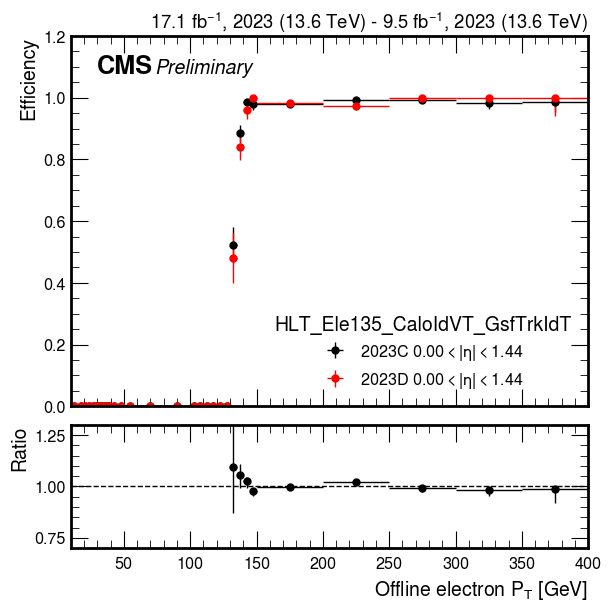

In [69]:
plot_ratio(
    hpt_barrel_pass1,
    hpt_barrel_all1,
    hpt_barrel_pass2,
    hpt_barrel_all2,
    label1=f"{run[0]} $0.00 < |\eta| < 1.44$",
    label2=f"{run[1]} $0.00 < |\eta| < 1.44$",
    plottype=plottype,
    figure_path=f"STEAM_plots_20October2023/{threshold}_{run[0]}_vs_{run[1]}_eff_barrel_pt.pdf",
    legend_kwargs={"title": title},
    cms_kwargs={"loc": 1, "rlabel": rlabel},
)

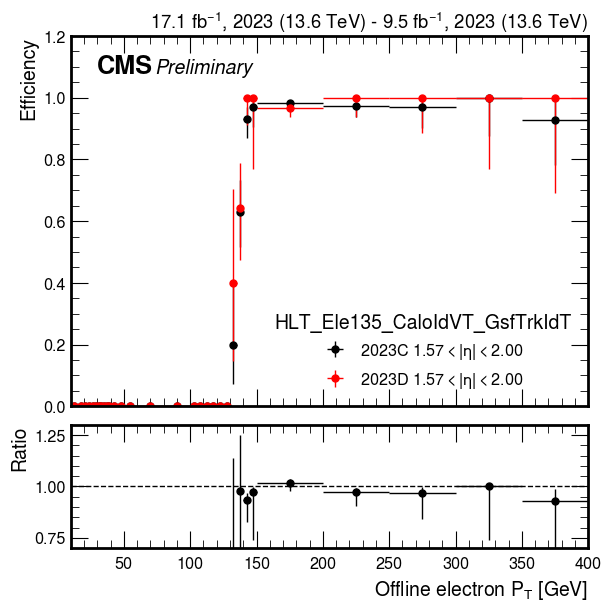

In [70]:
plot_ratio(
    hpt_endcap_loweta_pass1,
    hpt_endcap_loweta_all1,
    hpt_endcap_loweta_pass2,
    hpt_endcap_loweta_all2,
    label1=f"{run[0]} $1.57 < |\eta| < 2.00$",
    label2=f"{run[1]} $1.57 < |\eta| < 2.00$",
    plottype=plottype,
    figure_path=f"STEAM_plots_20October2023/{threshold}_{run[0]}_vs_{run[1]}_eff_endcap_loweta_pt.pdf",
    legend_kwargs={"title": title},
    cms_kwargs={"loc": 1, "rlabel": rlabel},
)

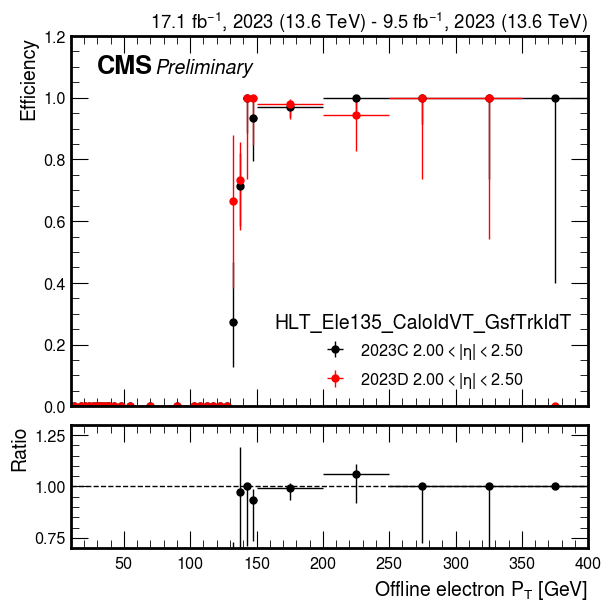

In [71]:
plot_ratio(
    hpt_endcap_higheta_pass1,
    hpt_endcap_higheta_all1,
    hpt_endcap_higheta_pass2,
    hpt_endcap_higheta_all2,
    label1=f"{run[0]} $2.00 < |\eta| < 2.50$",
    label2=f"{run[1]} $2.00 < |\eta| < 2.50$",
    plottype=plottype,
    figure_path=f"STEAM_plots_20October2023/{threshold}_{run[0]}_vs_{run[1]}_eff_endcap_higheta_pt.pdf",
    legend_kwargs={"title": title},
    cms_kwargs={"loc": 1, "rlabel": rlabel},
)

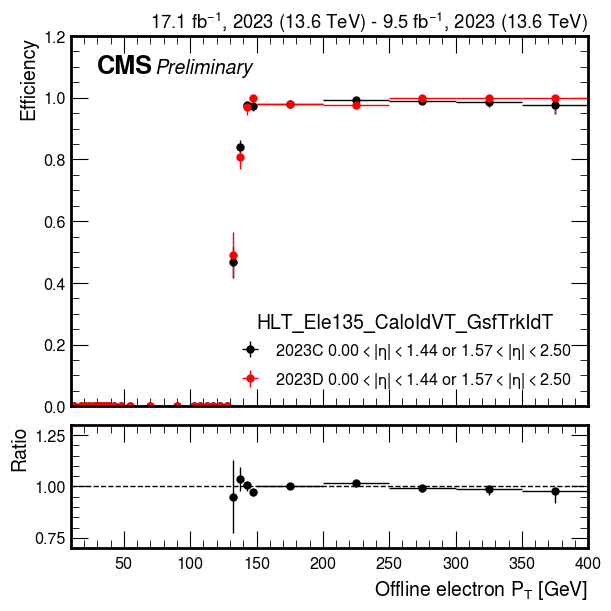

In [72]:
plot_ratio(
    hpt_combined_pass1,
    hpt_combined_all1,
    hpt_combined_pass2,
    hpt_combined_all2,
    label1=f"{run[0]} $0.00 < |\eta| < 1.44$ or $1.57 < |\eta| < 2.50$",
    label2=f"{run[1]} $0.00 < |\eta| < 1.44$ or $1.57 < |\eta| < 2.50$",
    plottype=plottype,
    figure_path=f"STEAM_plots_20October2023/{threshold}_{run[0]}_vs_{run[1]}_eff_combined_pt.pdf",
    legend_kwargs={"title": title},
    cms_kwargs={"loc": 1, "rlabel": rlabel},
)

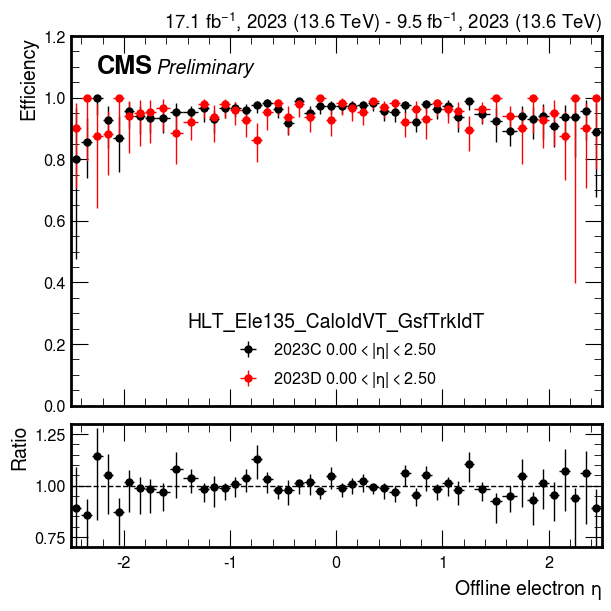

In [73]:
plot_ratio(
    heta_entire_pass1,
    heta_entire_all1,
    heta_entire_pass2,
    heta_entire_all2,
    label1=f"{run[0]} $0.00 < |\eta| < 2.50$",
    label2=f"{run[1]} $0.00 < |\eta| < 2.50$",
    plottype="eta",
    figure_path=f"STEAM_plots_20October2023/{threshold}_{run[0]}_vs_{run[1]}_eff_eta.pdf",
    legend_kwargs={"title": title},
    cms_kwargs={"loc": 1, "rlabel": rlabel},
)

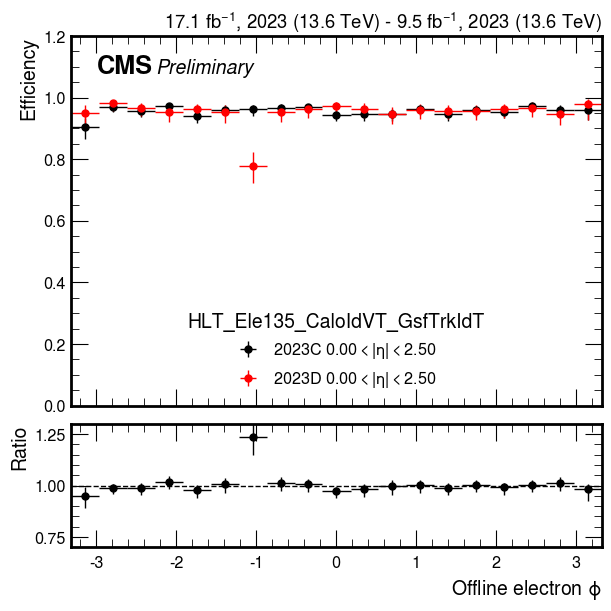

In [74]:
plot_ratio(
    hphi_entire_pass1,
    hphi_entire_all1,
    hphi_entire_pass2,
    hphi_entire_all2,
    label1=f"{run[0]} $0.00 < |\eta| < 2.50$",
    label2=f"{run[1]} $0.00 < |\eta| < 2.50$",
    plottype="phi",
    figure_path=f"STEAM_plots_20October2023/{threshold}_{run[0]}_vs_{run[1]}_eff_phi.pdf",
    legend_kwargs={"title": title},
    cms_kwargs={"loc": 1, "rlabel": rlabel},
)